The Y and X dimensions of the image: (2048, 2048)


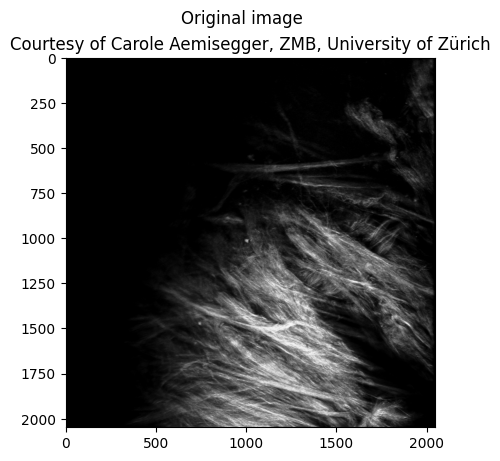

In [13]:
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy
import orientationpy
import tifffile
import matplotlib.image as mpimg
import cv2
# Load the greyscale image
#If it is a tiff file, use the following line:
#image = tifffile.imread("C:\\Users\\danwo\\Desktop\\ZS0001_TI_25XW_Rhodopsin_Au\\IVM4101#_TI_25XW_Rhodopsin_Au.png" )

#If it is a png file, use the following line:
#image = mpimg.imread("C:\\Users\\danwo\\Desktop\\ZS0001_TI_25XW_Rhodopsin_Au\\IVM4101#_TI_25XW_Rhodopsin_Au.png" )
image_path = "C:\\Users\\danwo\\Desktop\\ZS0001_TI_25XW_Rhodopsin_Au\\IVM4101#_TI_25XW_Rhodopsin_Au.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

print(f"The Y and X dimensions of the image: {image.shape}")
# Show image
plt.imshow(image, cmap="Greys_r")
plt.suptitle("Original image")
plt.title("Courtesy of Carole Aemisegger, ZMB, University of Zürich")
plt.show()

Gradient shape: (2048, 2048), (2048, 2048)
Gradient shape: (2048, 2048), (2048, 2048)
Gradient shape: (2048, 2048), (2048, 2048)


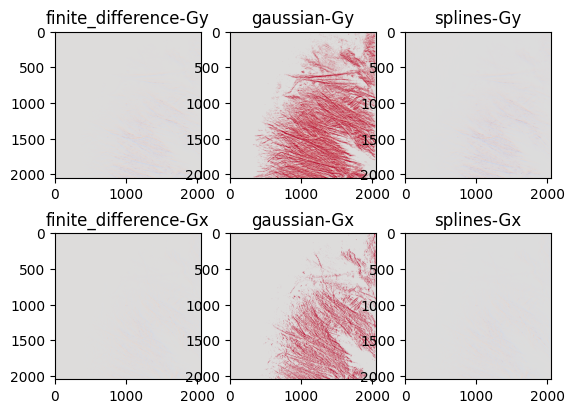

In [14]:
for n, mode in enumerate(["finite_difference", "gaussian", "splines"]):
    gradients = orientationpy.computeGradient(image, mode=mode)
    
    # Verificar si la imagen es 2D o 3D
    if len(gradients) == 2:  # Imagen 2D
        Gy, Gx = gradients
        print(f"Gradient shape: {Gy.shape}, {Gx.shape}")
    elif len(gradients) == 3:  # Imagen 3D
        Gz, Gy, Gx = gradients
        print(f"Gradient shape: {Gz.shape}, {Gy.shape}, {Gx.shape}")
    else:
        raise ValueError("La función computeGradient devolvió un número inesperado de gradientes.")
    
    # Mostrar los gradientes Gy y Gx
    plt.subplot(2, 3, n + 1)
    plt.title(f"{mode}-Gy")
    plt.imshow(Gy, cmap="coolwarm", vmin=-64, vmax=64)

    plt.subplot(2, 3, 3 + n + 1)
    plt.title(f"{mode}-Gx")
    plt.imshow(Gx, cmap="coolwarm", vmin=-64, vmax=64)

plt.show()

In [15]:
structureTensor = orientationpy.computeStructureTensor([Gy, Gx], sigma=2)


C:\Users\danwo\AppData\Local\Temp\ipykernel_6236\1431151139.py:7: RuntimeWarning: divide by zero encountered in log
  directionality = np.log(directionality).astype(np.float32)


12.968626
-inf
[12.83  12.843 12.847 12.867 12.88  12.908 12.916 12.93  12.94  12.969]
thresh_low -154.3655242919922
thresh_high 8.942376689910889


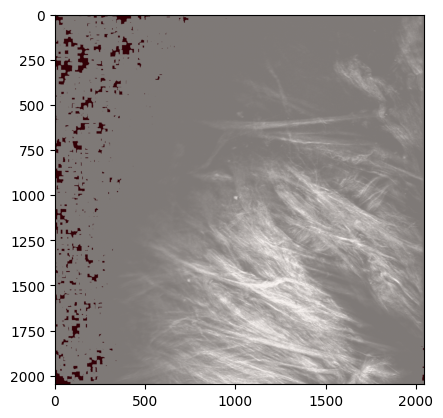

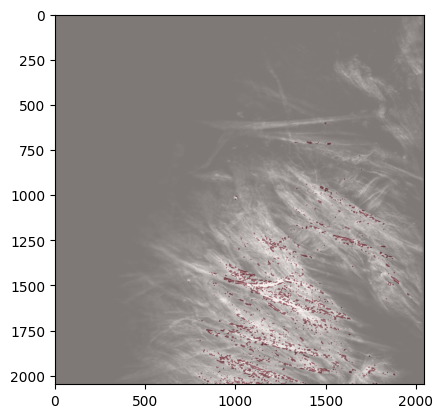

ValueError: supplied range of [-inf, 12.968626022338867] is not finite

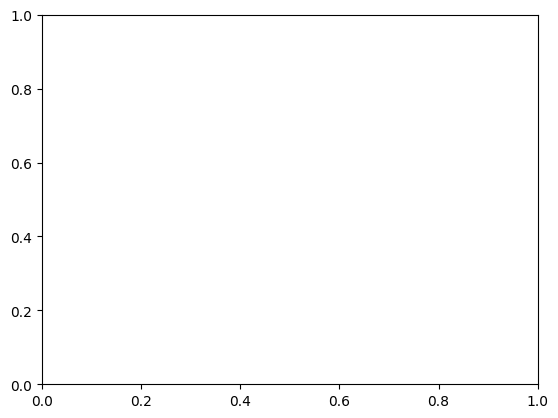

In [16]:
import numpy as np

intensity = orientationpy.computeIntensity(structureTensor)
directionality = orientationpy.computeStructureDirectionality(structureTensor)

# Aplicar logaritmo y convertir a float32
directionality = np.log(directionality).astype(np.float32)

print(directionality.flatten().max())
print(directionality.flatten().min())
print(np.sort(directionality.flatten())[-10:])
thresh_low = np.quantile(directionality.flatten(), 0.02)
print("thresh_low", thresh_low)
thresh_high = np.quantile(directionality.flatten(), 0.98)
print("thresh_high", thresh_high)

# Mostrar la imagen con los valores por debajo del umbral bajo
plt.imshow(image, cmap="Greys_r", vmin=0)
plt.imshow((directionality < thresh_low).astype(np.float32), cmap="Reds", alpha=0.5)
plt.show()

# Mostrar la imagen con los valores por encima del umbral alto
plt.imshow(image, cmap="Greys_r", vmin=0)
plt.imshow((directionality > thresh_high).astype(np.float32), cmap="Reds", alpha=0.5)
plt.show()

# Mostrar histograma de los valores de directionality
plt.figure()
plt.hist(directionality.flatten(), bins=20)
plt.show()

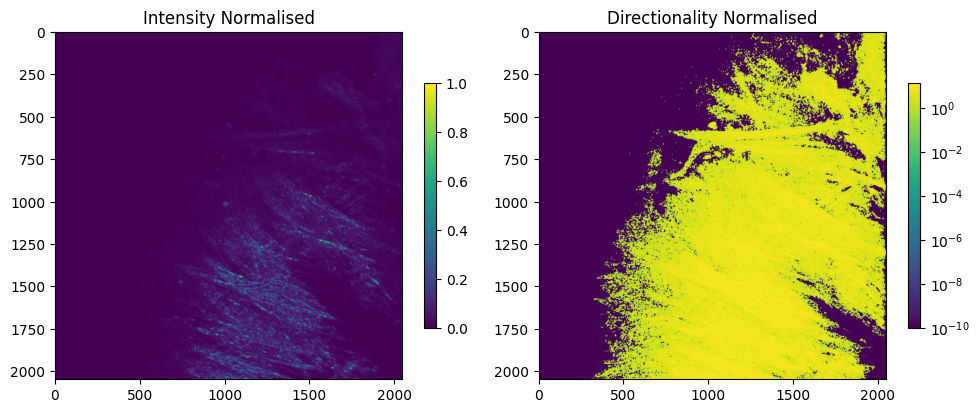

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Asegurarse de que directionality sea un array 2D y que todos los valores sean válidos
if directionality.ndim != 2:
    raise ValueError("El array 'directionality' debe ser 2D.")

# Reemplazar valores no finitos o <= 0 con un valor mínimo positivo
directionality = np.where(~np.isfinite(directionality) | (directionality <= 0), 1e-10, directionality)

plt.figure(figsize=(10, 4))

# La intensidad representa la fuerza de la señal de orientación
plt.subplot(1, 2, 1)
plt.imshow(intensity / intensity.max(), vmin=0, vmax=1)
plt.colorbar(shrink=0.7)
plt.title("Intensity Normalised")

# Mostrar la dirección con normalización logarítmica
plt.subplot(1, 2, 2)
plt.imshow(directionality, norm=matplotlib.colors.LogNorm(vmin=1e-10, vmax=directionality.max()))
plt.title("Directionality Normalised")
plt.colorbar(shrink=0.7)

plt.tight_layout()
plt.show()

In [ ]:
orientations = orientationpy.computeOrientation(structureTensor)


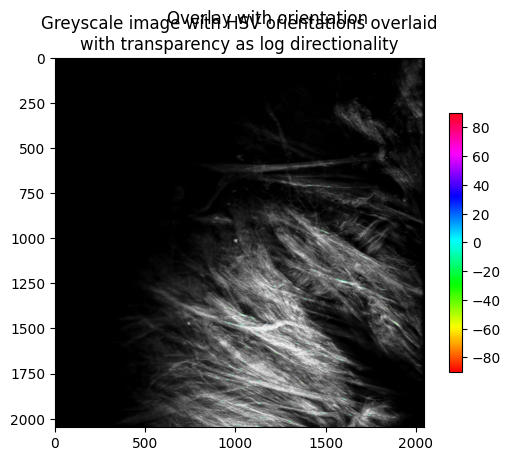

In [ ]:
vmin, vmax = 10, 1e8
normalized_directionality = numpy.clip(directionality, vmin, vmax)
normalized_directionality = numpy.log(normalized_directionality)
normalized_directionality -= normalized_directionality.min()
normalized_directionality /= normalized_directionality.max()
normalized_directionality[image == 0] = 0

try:
    plt.suptitle("Overlay with orientation")
    plt.title("Greyscale image with HSV orientations overlaid\nwith transparency as log directionality")
    plt.imshow(image, cmap="Greys_r", vmin=0)
    plt.imshow(
        orientations["theta"],
        cmap="hsv",
        alpha=normalized_directionality * 0.5,
        vmin=-90,
        vmax=90,
    )

    plt.colorbar(shrink=0.7)
    plt.show()
except:
    print("Didn't manage to make the plot :(")

Dimensiones de la imagen: (2048, 2048)


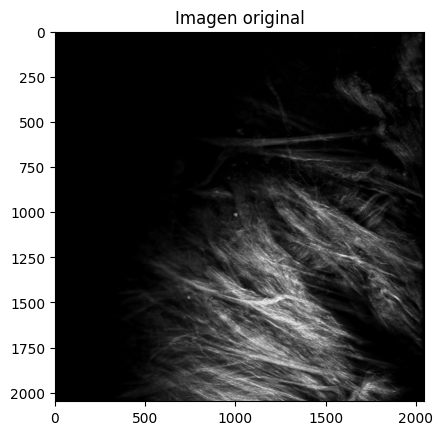

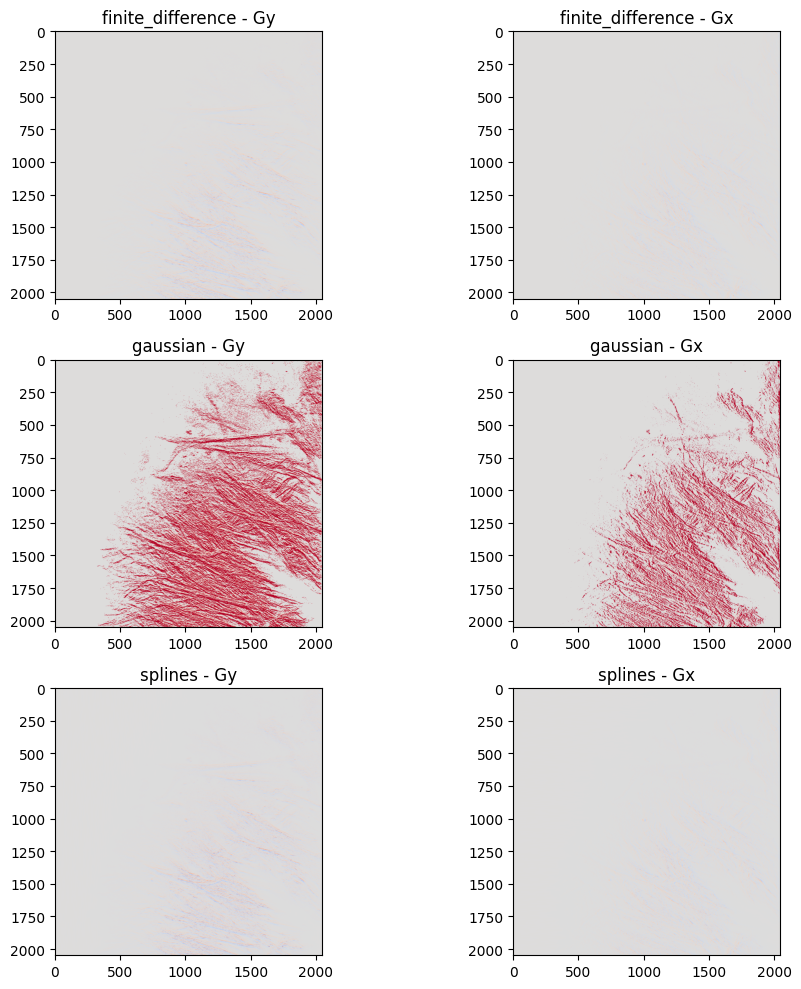

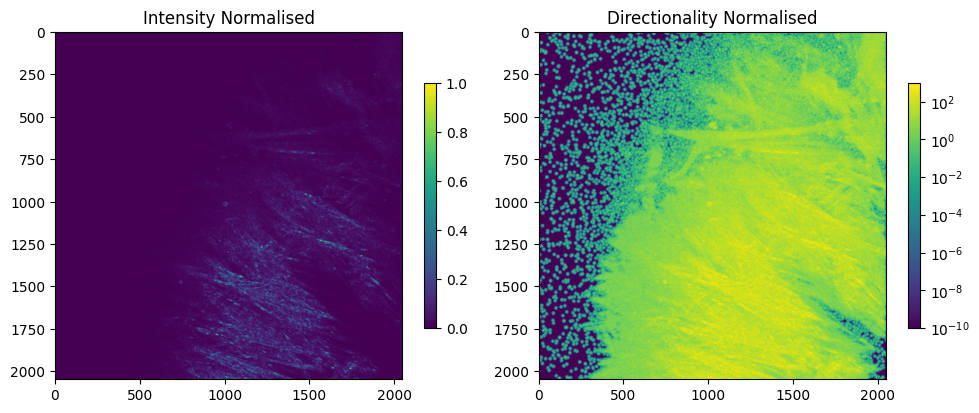

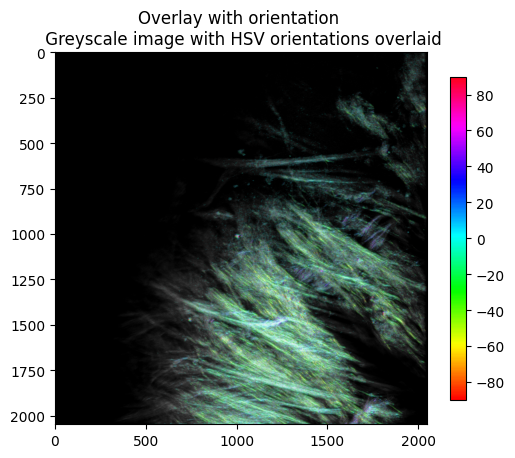

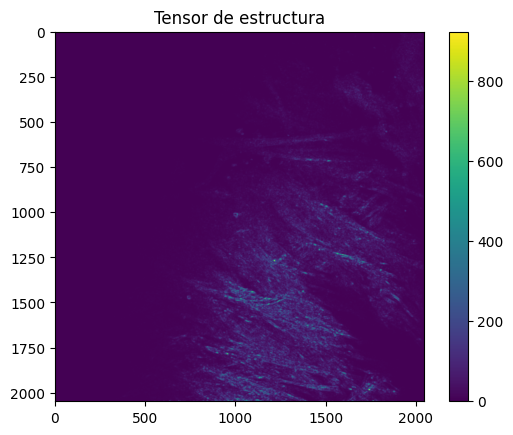

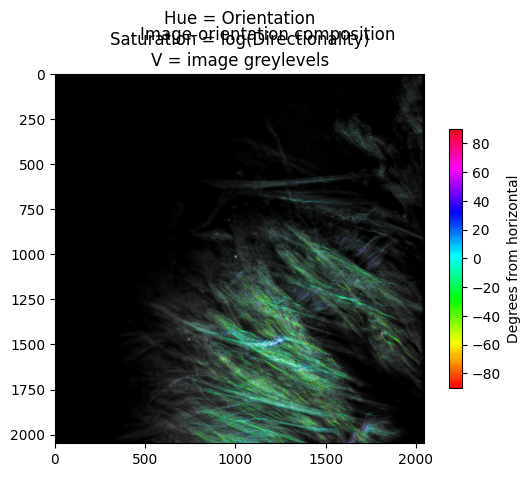

100%|██████████| 292/292 [00:01<00:00, 153.85it/s]


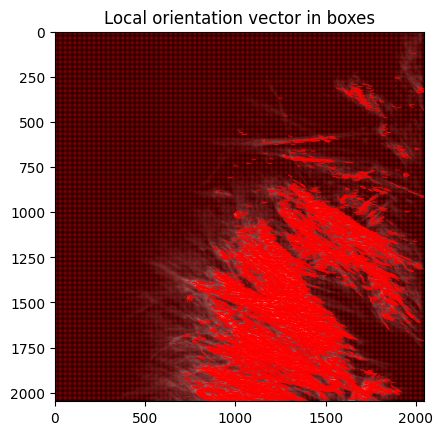

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import orientationpy
import matplotlib.colors

# Cargar la imagen en escala de grises
image_path = "C:\\Users\\danwo\\Desktop\\ZS0001_TI_25XW_Rhodopsin_Au\\IVM4101#_TI_25XW_Rhodopsin_Au.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"No se pudo cargar la imagen en {image_path}")

print(f"Dimensiones de la imagen: {image.shape}")

# Mostrar la imagen original
plt.imshow(image, cmap="gray")
plt.title("Imagen original")
plt.show()

# Calcular gradientes con diferentes métodos
methods = ["finite_difference", "gaussian", "splines"]
fig, axes = plt.subplots(len(methods), 2, figsize=(10, 10))

for i, mode in enumerate(methods):
    gradients = orientationpy.computeGradient(image, mode=mode)
    Gy, Gx = gradients[-2:]  # Extraer solo Gy y Gx
    
    # Mostrar gradientes
    axes[i, 0].imshow(Gy, cmap="coolwarm", vmin=-64, vmax=64)
    axes[i, 0].set_title(f"{mode} - Gy")
    
    axes[i, 1].imshow(Gx, cmap="coolwarm", vmin=-64, vmax=64)
    axes[i, 1].set_title(f"{mode} - Gx")

plt.tight_layout()
plt.show()

# Calcular el tensor de estructura
structureTensor = orientationpy.computeStructureTensor([Gy, Gx], sigma=2)

# Calcular la dirección y orientación
orientations = orientationpy.computeOrientation(structureTensor)
directionality = np.linalg.norm(structureTensor, axis=0)

# Asegurar valores positivos para normalización logarítmica
directionality = np.where(~np.isfinite(directionality) | (directionality <= 0), 1e-10, directionality)

plt.figure(figsize=(10, 4))

# Mostrar intensidad normalizada
plt.subplot(1, 2, 1)
plt.imshow(directionality / directionality.max(), vmin=0, vmax=1)
plt.colorbar(shrink=0.7)
plt.title("Intensity Normalised")

# Mostrar dirección con normalización logarítmica
plt.subplot(1, 2, 2)
plt.imshow(directionality, norm=matplotlib.colors.LogNorm(vmin=1e-10, vmax=directionality.max()))
plt.title("Directionality Normalised")
plt.colorbar(shrink=0.7)

plt.tight_layout()
plt.show()

# Normalizar dirección
vmin, vmax = 10, np.max(directionality)
directionality = np.clip(directionality, vmin, vmax)
directionality = np.log(directionality)
directionality -= directionality.min()
directionality /= directionality.max()
directionality[image == 0] = 0

# Visualizar imagen con orientación HSV superpuesta
plt.figure(figsize=(6, 6))
plt.title("Overlay with orientation \n Greyscale image with HSV orientations overlaid")

plt.imshow(image, cmap="Greys_r", vmin=0)
plt.imshow(
    orientations["theta"],
    cmap="hsv",
    alpha=directionality * 0.5,
    vmin=-90,
    vmax=90,
)
plt.colorbar(shrink=0.7)
plt.show()

# Visualizar el tensor de estructura
plt.imshow(structureTensor.sum(axis=0), cmap="viridis")
plt.title("Tensor de estructura")
plt.colorbar()
plt.show()

# Convertir imagen a HSV
imDisplayHSV = np.zeros((image.shape[0], image.shape[1], 3), dtype="f4")
imDisplayHSV[:, :, 0] = (orientations["theta"] + 90) / 180  # Hue
imDisplayHSV[:, :, 1] = directionality  # Saturation
imDisplayHSV[:, :, 2] = image / image.max()  # Value

fig, ax = plt.subplots()
fig.suptitle("Image-orientation composition")
ax.set_title("Hue = Orientation\nSaturation = log(Directionality)\nV = image greylevels")
ax.imshow(matplotlib.colors.hsv_to_rgb(imDisplayHSV))

cmap = matplotlib.cm.hsv
norm = matplotlib.colors.Normalize(vmin=-90, vmax=90)
fig.colorbar(
    matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=ax,
    orientation="vertical",
    label="Degrees from horizontal",
    shrink=0.7,
)

plt.show()

# Cálculo de orientación en bloques
boxSizePixels = 7
structureTensorBoxes = orientationpy.computeStructureTensorBoxes(
    [Gy, Gx], [boxSizePixels, boxSizePixels]
)
intensityBoxes = orientationpy.computeIntensity(structureTensorBoxes)
orientationsBoxes = orientationpy.computeOrientation(structureTensorBoxes, mode="fiber")
intensityBoxes /= intensityBoxes.max()

# Calcular centros de bloques
boxCentresY = np.arange(orientationsBoxes["theta"].shape[0]) * boxSizePixels + boxSizePixels // 2
boxCentresX = np.arange(orientationsBoxes["theta"].shape[1]) * boxSizePixels + boxSizePixels // 2

# Calcular componentes del vector
boxVectorsYX = orientationpy.anglesToVectors(orientationsBoxes)
boxVectorsYX[:, intensityBoxes < 0.05] = 0.0

plt.title("Local orientation vector in boxes")
plt.imshow(image, cmap="Greys_r", vmin=0)

plt.quiver(
    boxCentresX,
    boxCentresY,
    boxVectorsYX[1],
    boxVectorsYX[0],
    angles="xy",
    scale_units="xy",
    color="r",
    headwidth=0,
    headlength=0,
    headaxislength=1,
)
plt.show()


In [ ]:
import matplotlib
print(matplotlib.__version__)

3.10.1


Esto no está funcionando muy bien porque mis imagenes no son 2D sino que 3D y no consigo adaptarlo bien

Ahora voy a coger el apartado suyo que hace 3D

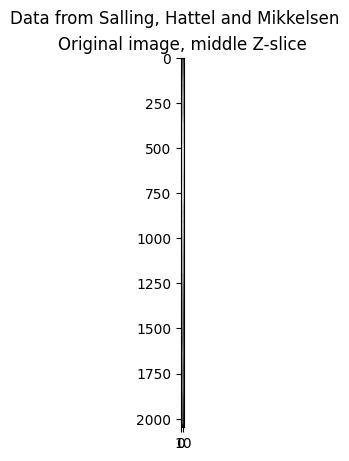

In [ ]:
# Load the greyscale image
# Data cropped from Salling, Hattel and Mikkelsen
#   X-ray computed tomography and scanning electron microscopy datasets of unidirectional and textured glass fibre composites
#   https://zenodo.org/record/5483719#.Yyra4vFBy2A
#image = tifffile.imread("../data/3D/big-bin4.tif")

import os
import cv2
def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("No se pudo cargar la imagen")
    return img

def stack_images_to_3d(folder_path):
    image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.tif'))])
    if not image_files:
        raise ValueError("No se encontraron imágenes en la carpeta")
    
    images = [load_image(os.path.join(folder_path, f)) for f in image_files]
    volume = np.stack(images, axis=-1)  # Apila las imágenes en la tercera dimensión
    return volume

folder_path = "C:\\Users\\danwo\\Desktop\\ZS0001_TI_25XW_Rhodopsin_Au"
image= stack_images_to_3d(folder_path)

# print(f"The Z, Y and X dimensions of the image: {im.shape}")
# -- Show image
plt.imshow(image[image.shape[0] // 2], cmap="Greys_r")
plt.title("Original image, middle Z-slice")
plt.suptitle("Data from Salling, Hattel and Mikkelsen")
plt.show()